In [107]:
#import
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots  import plot_pacf
from pandas_datareader import data as wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
%matplotlib notebook


In [58]:
# get the price action for Procter & Gamble (the code is PG)
PG=wb.DataReader('PG',data_source='yahoo')
# calculate the logaritmic daily return of assets. The formula is log(price(T)/price(T-1)), where T is the time. 
PG['log_return']=np.log(PG['Close']/PG['Close'].shift(1))
# eliminate the first value (beacuse is nan)
PG=PG[1:]

In [126]:
# the series has to be stationary and we use dickey fuller test for unit root
result = adfuller(PG['log_return'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) # if p value is lower then 0.05, we reject the null hypothesis, so the serie stationary


ADF Statistic: -11.712445
p-value: 0.000000


<IPython.core.display.Javascript object>


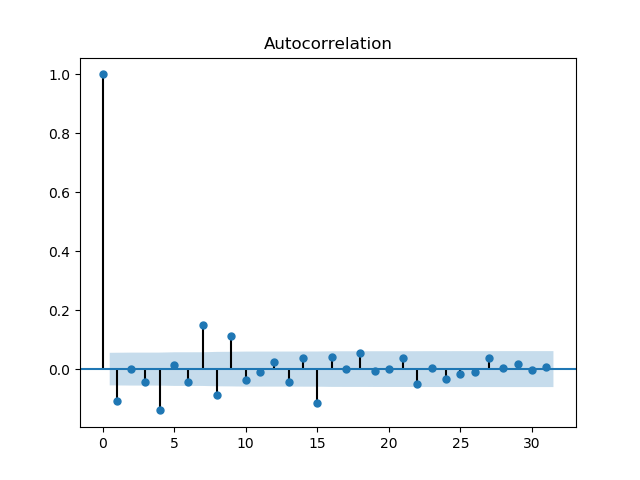

In [60]:
# plot the acf to knowing the q value
plot_acf(PG['log_return'])
plt.show()

<IPython.core.display.Javascript object>


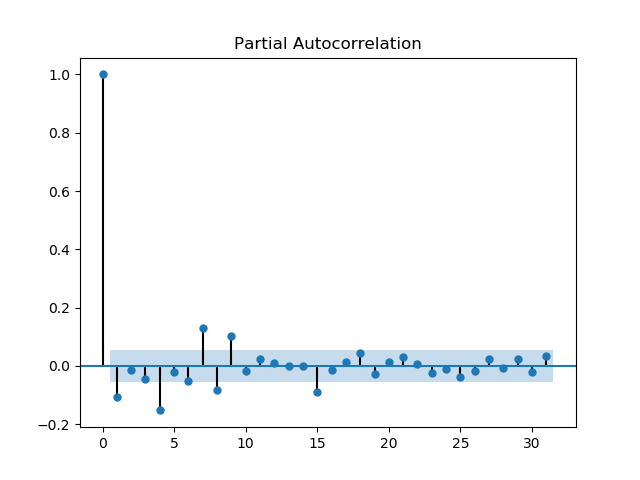

In [19]:
# plot the pacf to knowing the p value
plot_pacf(PG['log_return'])
plt.show()

In [130]:
# build ARIMA with p=1,q=1, and d=0 (because is statinary)
model = ARIMA(PG['log_return'], order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary()) # p values for  ar and ma ar lower then 0.05, so the model is valid (with 95% conffidence)

C:\Users\Dragos\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             log_return   No. Observations:                 1257
Model:                     ARMA(1, 1)   Log Likelihood                3700.665
Method:                       css-mle   S.D. of innovations              0.013
Date:                Sun, 14 Jun 2020   AIC                          -7393.331
Time:                        10:03:20   BIC                          -7372.785
Sample:                             0   HQIC                         -7385.609
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0003      0.000      1.162      0.246      -0.000       0.001
ar.L1.log_return     0.5987      0.094      6.369      0.000       0.414       0.783
ma.L1.log_return    -0.7087 

In [131]:
# calculate the accuracy
str(np.round(np.sqrt(metrics.mean_absolute_error(PG['log_return'],model_fit.fittedvalues))*100,2))+'%'

'9.0%'

<IPython.core.display.Javascript object>


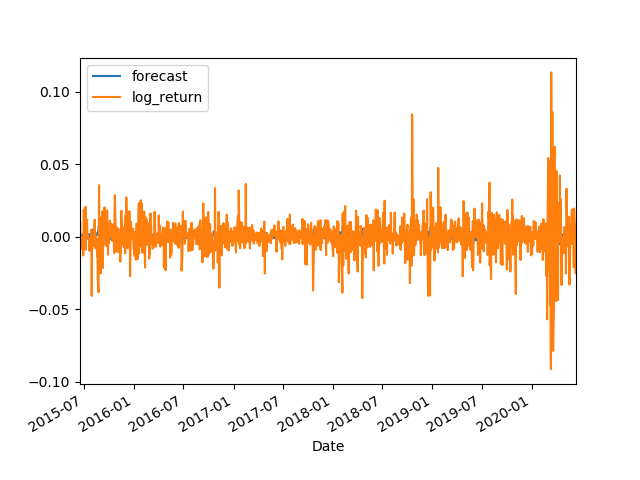

In [133]:
# the accuracy is low, because ARIMA model is build for time series, but, the financial series are more valatile
model_fit.plot_predict(dynamic=False)
plt.show()